In [1]:
import os
import sys

import os
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()

import unsupervised_learning_util as utl
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

plt.tight_layout()
plt.style.use("ggplot")
mpl.rcParams['figure.figsize'] = [8, 6]
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['savefig.dpi'] = 500


NJOBS = 32
VERBOSE = 0
limit = 5000

folder = "DimensionalityReduction/"
utl.check_folder(folder)

%matplotlib inline

C:\Users\joshu\OneDrive - Georgia Institute of Technology\Georgia-Tech\CS 7641 - Machine Learning\Assignments\Unsupervised Learning and Dimensionality Reduction\DimensionalityReduction/ folder already exists.


In [2]:
gathered_data = utl.setup(["MNIST"])
gathered_data_fashion = utl.setup(["Fashion-MNIST"])

mnist = {}
fashion_mnist = {}
mnist_not_scaled = {}
fashion_mnist_not_scaled = {}

mnist['train_X'], mnist['train_y'], \
mnist['valid_X'], mnist['valid_y'], \
mnist['test_X'], mnist['test_y'] = utl.split_data(gathered_data["MNIST"]["X"],
                                                  gathered_data["MNIST"]["y"], minMax=True)
mnist_not_scaled['train_X'], mnist_not_scaled['train_y'], \
mnist_not_scaled['valid_X'], mnist_not_scaled['valid_y'], \
mnist_not_scaled['test_X'], mnist_not_scaled['test_y'] = utl.split_data(
    gathered_data["MNIST"]["X"], gathered_data["MNIST"]["y"], scale=False)

fashion_mnist['train_X'], fashion_mnist['train_y'], \
fashion_mnist['valid_X'], fashion_mnist['valid_y'], \
fashion_mnist['test_X'], fashion_mnist['test_y'] = utl.split_data(gathered_data_fashion["Fashion-MNIST"]["X"],
                                                                  gathered_data_fashion["Fashion-MNIST"]["y"],
                                                                  minMax=True)

fashion_mnist_not_scaled['train_X'], fashion_mnist_not_scaled['train_y'], \
fashion_mnist_not_scaled['valid_X'], fashion_mnist_not_scaled['valid_y'], \
fashion_mnist_not_scaled['test_X'], fashion_mnist_not_scaled['test_y'] = utl.split_data(
    gathered_data_fashion["Fashion-MNIST"]["X"], gathered_data_fashion["Fashion-MNIST"]["y"], scale=False)

dataset folder already exists.
MNIST dataset found:
	Loading MNIST.feather
	Finished loading MNIST dataset
dataset folder already exists.
Fashion-MNIST dataset found:
	Loading Fashion-MNIST.feather
	Finished loading Fashion-MNIST dataset


# Dimensionality Reduction

## PCA

In [ ]:
# Do Not Run unless you have the time or do not have the result file
mnist_results = utl.run_pca(mnist["train_X"].iloc[:limit, :],
                                                    keep_variance=0.9, dataset_name="MNIST")
fashion_results = utl.run_pca(fashion_mnist["train_X"].iloc[:limit, :],
                                                    keep_variance=0.9, dataset_name="Fashion")

In [3]:
with open(f"{os.getcwd()}/DimensionalityReduction/PrincipleComponentAnalysis/"
          f"MNIST_PCA_Results.pkl", "rb") as input_file:
    mnist_results = pickle.load(input_file)
    input_file.close()

with open(f"{os.getcwd()}/DimensionalityReduction/PrincipleComponentAnalysis/"
          f"Fashion_PCA_Results.pkl", "rb") as input_file:
    fashion_results = pickle.load(input_file)
    input_file.close()

Starting Heatmap
Heatmap Finished
Starting Heatmap
Heatmap Finished
Starting Heatmap
Heatmap Finished
Starting Heatmap
Heatmap Finished


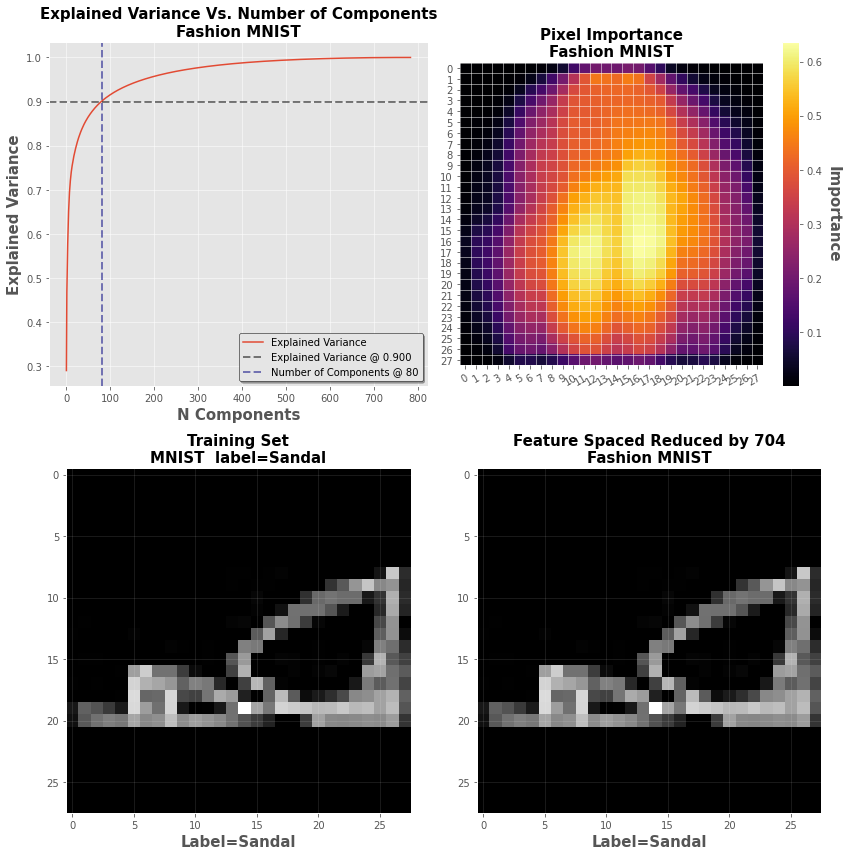

In [4]:
utl.plot_pca_results(mnist_results=mnist_results, fashion_results=fashion_results,
                     mnist_X=mnist_not_scaled["train_X"].iloc[:limit, :],
                     mnist_y=mnist_not_scaled["train_y"].iloc[:limit],
                     fashion_X=fashion_mnist_not_scaled["train_X"].iloc[:limit, :],
                     fashion_y=fashion_mnist_not_scaled["train_y"].iloc[:limit])

## ICA

In [ ]:
# Do Not Run unless you have the time or do not have the result file
ica_results_mnist = utl.run_ica(mnist["train_X"].iloc[:limit, :],
                                600, load_pkl=False, dataset_name="MNIST")
ica_results_fashion = utl.run_ica(fashion_mnist["train_X"].iloc[:limit, :],
                                  600, load_pkl=False, dataset_name="Fashion_MNIST")

In [5]:
with open(f"{os.getcwd()}/DimensionalityReduction/"
          f"IndependentComponentAnalysis/MNIST_ICA_Results.pkl", "rb") as input_file:
    ica_results_mnist = pickle.load(input_file)
    input_file.close()
with open(f"{os.getcwd()}/DimensionalityReduction/"
          f"IndependentComponentAnalysis/Fashion_MNIST_ICA_Results.pkl", "rb") as input_file:
    ica_results_fashion = pickle.load(input_file)
    input_file.close()

Starting Heatmap
Heatmap Finished


C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Starting Heatmap
Heatmap Finished


C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Starting Heatmap
Heatmap Finished


C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Starting Heatmap
Heatmap Finished


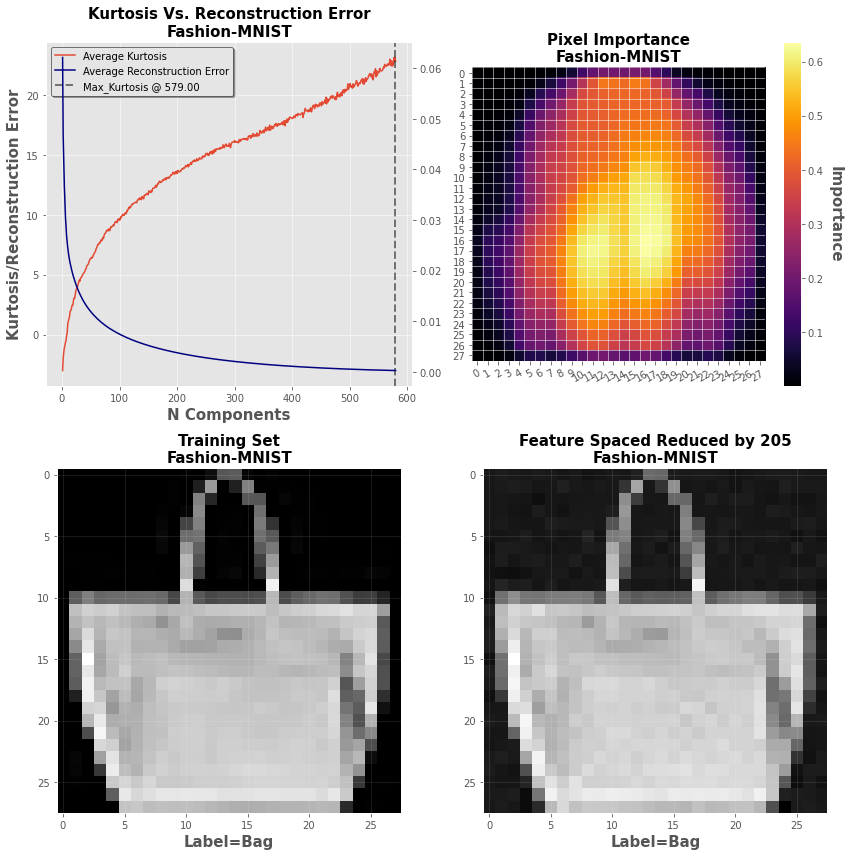

In [6]:
utl.plot_ica_results(ica_results_mnist, ica_results_fashion,
                     mnist_data=mnist["train_X"].iloc[:limit, :],
                     fashion_data=fashion_mnist["train_X"].iloc[:limit, :],
                     mnist_X=mnist_not_scaled["train_X"].iloc[:limit, :],
                     mnist_y=mnist_not_scaled["train_y"].iloc[:limit],
                     fashion_X=fashion_mnist_not_scaled["train_X"].iloc[:limit, :],
                     fashion_y=fashion_mnist_not_scaled["train_y"].iloc[:limit],
                     mnist_X_scaled=mnist["train_X"].iloc[:limit, :],
                     mnist_y_scaled=mnist["train_y"].iloc[:limit],
                     fashion_X_scaled=fashion_mnist["train_X"].iloc[:limit, :],
                     fashion_y_scaled=fashion_mnist["train_y"].iloc[:limit])

## Randomized Projections

In [ ]:
# Do Not Run unless you have the time or do not have the result file
random_projection_mnist = utl.run_randomized_projections(data=mnist["train_X"].iloc[:limit, :],
                                                         dataset_name="MNIST", max_components=751, load_pkl=False)
random_projection_fashion = utl.run_randomized_projections(data=fashion_mnist["train_X"].iloc[:limit, :],
                                                           dataset_name="Fashion", max_components=751, load_pkl=False)

In [7]:
with open(f"{os.getcwd()}/DimensionalityReduction/"
          f"RandomProjections/MNIST_RP_results.pkl", "rb") as input_file:
    rp_results_mnist = pickle.load(input_file)
    input_file.close()

with open(f"{os.getcwd()}/DimensionalityReduction/"
          f"RandomProjections/Fashion_RP_results.pkl", "rb") as input_file:
    rp_results_fashion = pickle.load(input_file)
    input_file.close()

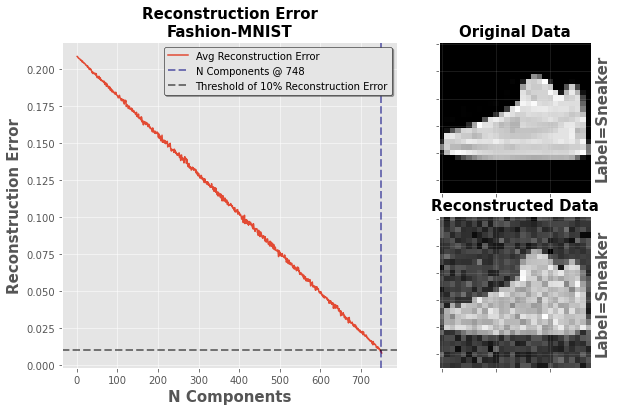

In [8]:
utl.plot_randomized_projection_results(rp_results_mnist, rp_results_fashion,
                                       mnist_X=mnist_not_scaled["train_X"].iloc[:limit, :],
                                       mnist_y=mnist_not_scaled["train_y"].iloc[:limit],
                                       fashion_X=fashion_mnist_not_scaled["train_X"].iloc[:limit, :],
                                       fashion_y=fashion_mnist_not_scaled["train_y"].iloc[:limit],
                                       mnist_X_scaled=mnist["train_X"].iloc[:limit, :],
                                       mnist_y_scaled=mnist["train_y"].iloc[:limit],
                                       fashion_X_scaled=fashion_mnist["train_X"].iloc[:limit, :],
                                       fashion_y_scaled=fashion_mnist["train_y"].iloc[:limit])

## Random Forest

In [ ]:
# Do Not Run unless you have the time or do not have the result file
random_forest_mnist = utl.run_random_forest(data_X=mnist["train_X"].iloc[:limit, :],
                                            data_y=mnist["train_y"].iloc[:limit],
                                            dataset_name="MNIST", max_components=751, load_pkl=False,
                                            valid_X=mnist["valid_X"].iloc[:limit, :],
                                            valid_y=mnist["valid_y"].iloc[:limit])
random_forest_fashion = utl.run_random_forest(data_X=fashion_mnist["train_X"].iloc[:limit, :],
                                              data_y=fashion_mnist["train_y"].iloc[:limit],
                                              valid_X=fashion_mnist["valid_X"].iloc[:limit, :],
                                              valid_y=fashion_mnist["valid_y"].iloc[:limit],
                                              dataset_name="Fashion", max_components=751, load_pkl=False)

In [9]:
with open(f"{os.getcwd()}/DimensionalityReduction/RandomForest/RandomForest_MNIST_Results.pkl", "rb") as input_file:
    rf_results_mnist = pickle.load(input_file)
    input_file.close()
with open(f"{os.getcwd()}/DimensionalityReduction/RandomForest/RandomForest_Fashion_Results.pkl", "rb") as input_file:
    rf_results_fashion = pickle.load(input_file)
    input_file.close()

Starting Heatmap
Heatmap Finished
Starting Heatmap
Heatmap Finished
Starting Heatmap
Heatmap Finished
Starting Heatmap
Heatmap Finished


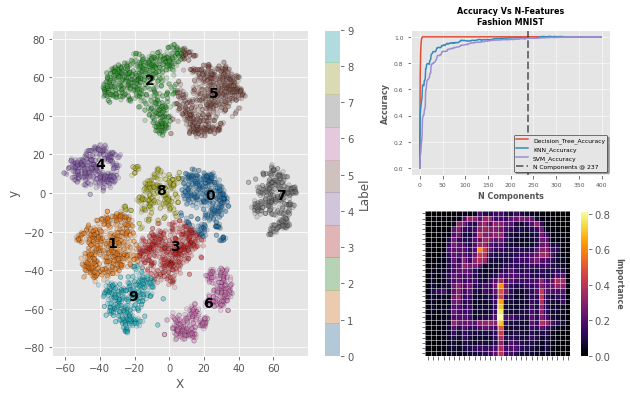

In [10]:
utl.plot_random_forest_results(mnist_results=rf_results_mnist, fashion_results=rf_results_fashion,
                               mnist_X=mnist_not_scaled["train_X"].iloc[:limit, :],
                               mnist_y=mnist_not_scaled["train_y"].iloc[:limit],
                               fashion_X=fashion_mnist_not_scaled["train_X"].iloc[:limit, :],
                               fashion_y=fashion_mnist_not_scaled["train_y"].iloc[:limit])